In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
plt.rcParams["figure.figsize"] = (12,8)

# Example N°4 - Seasonal Sales of Chocolates

In [3]:
df = pd.read_csv('../Datasets/DATA_4.04_CHOC.csv')
df.head()

,time,sales,year,month
0,1,135.481871,2000,01_January
1,2,281.758729,2000,02_February
2,3,170.800637,2000,03_March
3,4,171.095116,2000,04_April
4,5,179.024920,2000,05_May


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    120 non-null    int64  
 1   sales   120 non-null    float64
 2   year    120 non-null    int64  
 3   month   120 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ KB


In [5]:
df['sales'].describe()

count     120.000000
mean      216.699587
std       210.227811
min        36.854401
25%        82.883337
50%       163.041470
75%       221.328853
max      1068.622183
Name: sales, dtype: float64

Text(0.5, 1.0, 'Chocolate Sales Over Time')

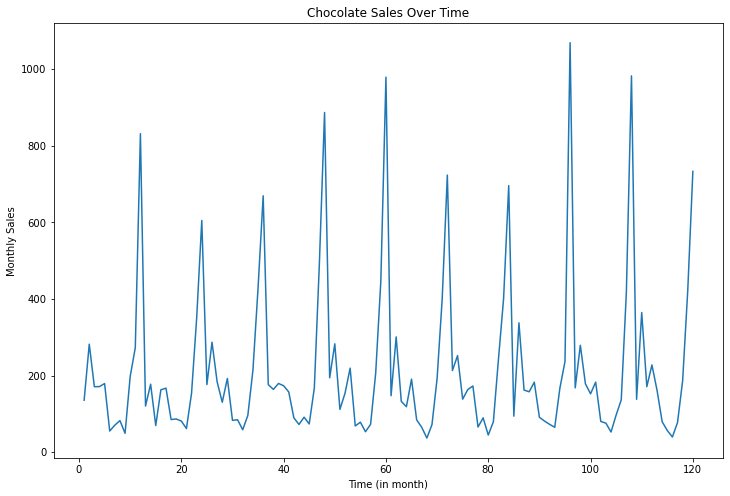

In [6]:
plt.plot(df['time'], df['sales'])
plt.ylabel('Monthly Sales')
plt.xlabel('Time (in month)')
plt.title('Chocolate Sales Over Time')

We recognize saisonality in the chocolate sales.

In [13]:
df['month'] = df['month'].apply(lambda x: x.replace('_',' '))

In [23]:
df['period'] = df['month']  + [' '] + df['year'].astype(str)

In [25]:
pd.to_datetime(df['period'])

0     2000-01-01
1     2000-02-02
2     2000-03-03
3     2000-04-04
4     2000-05-05
         ...    
115   2009-08-08
116   2009-09-09
117   2009-10-10
118   2009-11-11
119   2009-12-12
Name: period, Length: 120, dtype: datetime64[ns]

In [28]:
linreg = smf.ols('sales~month', data=df).fit()

In [29]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.87e-57
Time:                        09:29:53   Log-Likelihood:                -650.98
No. Observations:                 120   AIC:                             1326.
Df Residuals:                     108   BIC:                             1359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               156.2110     18.306      8.533      0.000     119.925     192.497
month[T.02 February]    116.3766     25.889      4.495      0.000      65.060     167.693
month[T.03 March]        -6.5590     25.889     -0.253      0.800     -57.876      44.758
month[T.04 April]         4.8465     25.889      0.187      0.852     -46.470      56.163
month[T.05 May]          24.2454     25.889      0.937      0.351     -27.071      75.562
month[T.06 June]        -78.0337     25.889     -3.014      0.003    -129.350     -26.717
month[T.07 July]        -80.2622     25.889     -3.100      0.002    -131.579     -28.945
month[T.08 August]      -94.9413     25.889     -3.667      0.000    -146.258     -43.625
month[T.09 September]   -81.9211     25.889     -3.164      0.002    -133.238     -30.604
month[T.10 October]      30.1851     25.889      1.166      0.246     -21.132      81.502
month[T.11 November]    230.8937     25.889      8.919      0.000     179.577     282.210
month[T.12 December]    661.0336     25.889     25.533      0.000     609.717     712.350
==============================================================================
Omnibus:                       24.394   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.169
Skew:                           0.211   Prob(JB):                     3.04e-37
Kurtosis:                       8.784   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

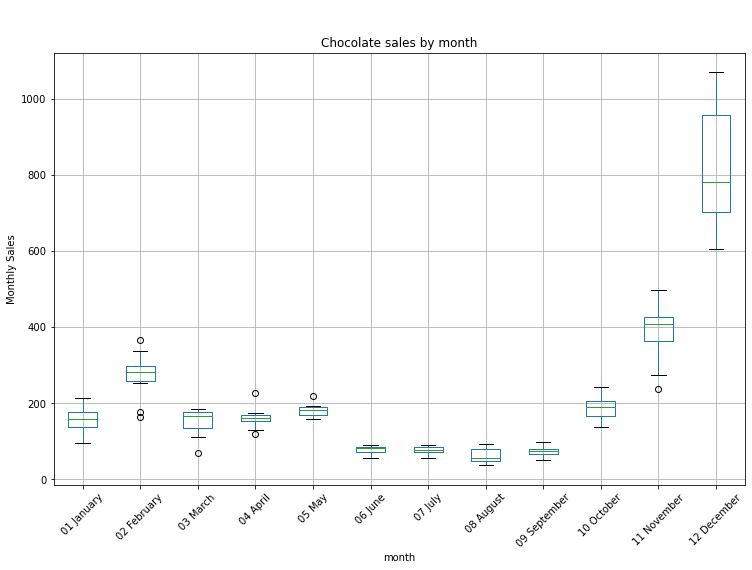

In [46]:
df.boxplot(column='sales', by='month', rot=45)
plt.title('Chocolate sales by month')
plt.suptitle(' ')
plt.ylabel('Monthly Sales');

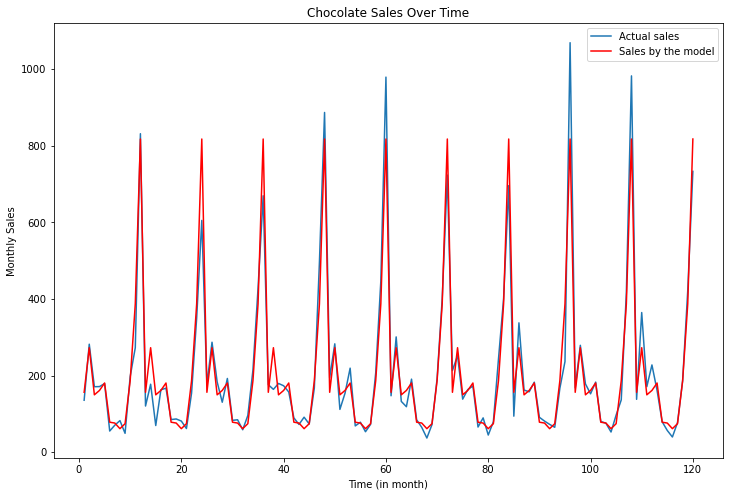

In [47]:
# Recovery thanks to the model
plt.plot(df['time'], df['sales'])
plt.plot(df['time'], linreg.fittedvalues, 'r-')

plt.ylabel('Monthly Sales')
plt.xlabel('Time (in month)')
plt.title('Chocolate Sales Over Time')
plt.legend(['Actual sales', 'Sales by the model'])